 <h1 style="color:green;"> Objective: 🚀</h1>

## Probleam Statement:

As a team we were asked to work under an Online Vehicle Booking Product Startup. Due to heavy competition in cab booking from Ola and Uber in India, the startup is looking for an alternate segment which can generate early traction in the market and revenue.


We have to analyse the Vehicle Booking market in India using segmentation analysis and come up with a feasible strategy to enter the market, targeting the segments where there can be possible profit by offering Vehicle booking services.


<h1 style="color:green;"> Step 1: Load the Data  🚀</h1>

In [1]:
import pandas as pd

file_path = r"C:\Users\priya\Downloads\indian-ev-data.csv"
ev_data = pd.read_csv(file_path)

In [2]:
ev_data.head()

,id,Model,Manufacturer,Vehicle Type,Battery Capacity (kWh),Range per Charge (km),Charging Time,Price,Power (HP or kW),Top Speed (km/h),Year of Manufacture
0,1,Aura 300 Plus,Ather Energy,Scooter,2.9,116,4.5,129000.0,6.0,80.0,2021.0
1,2,Pure EV Epluto 7G,Pure EV,Scooter,2.7,120,3.0,109000.0,5.0,80.0,2021.0
2,3,Bajaj Chetak Electric,Bajaj Auto,Scooter,4.0,95,5.0,150000.0,4.0,60.0,2020.0
3,4,Okinawa iPraise Pro,Okinawa Autotech,Scooter,2.5,100,3.0,85000.0,3.0,60.0,2021.0
4,5,Hero Electric Opto EV,Hero Motocorp,Scooter,2.2,75,3.0,75000.0,3.0,60.0,2021.0


<h1 style="color:green;"> Step 2: Examine the Data Structure and Summary Statistics 🚀</h1>

In [3]:
# examine the data

ev_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      50 non-null     int64  
 1   Model                   50 non-null     object 
 2   Manufacturer            50 non-null     object 
 3   Vehicle Type            50 non-null     object 
 4   Battery Capacity (kWh)  50 non-null     float64
 5   Range per Charge (km)   50 non-null     int64  
 6   Charging Time           49 non-null     float64
 7   Price                   49 non-null     float64
 8   Power (HP or kW)        49 non-null     float64
 9   Top Speed (km/h)        49 non-null     float64
 10  Year of Manufacture     49 non-null     float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.4+ KB


In [4]:
# Display summary statistics
ev_data.describe()

,id,Battery Capacity (kWh),Range per Charge (km),Charging Time,Price,Power (HP or kW),Top Speed (km/h),Year of Manufacture
count,50.00000,50.000000,50.000000,49.000000,49.000000,49.000000,49.000000,49.000000
mean,25.50000,3.188000,120.160000,3.755102,120469.387755,6.795918,73.775510,2021.204082
std,14.57738,0.950325,30.370743,0.947158,46317.789078,6.570070,13.288882,0.499149
min,1.00000,2.200000,75.000000,2.500000,60000.000000,2.000000,50.000000,2020.000000
25%,13.25000,2.550000,100.000000,3.000000,85000.000000,3.000000,60.000000,2021.000000
50%,25.50000,2.900000,118.000000,3.500000,109000.000000,5.000000,80.000000,2021.000000
75%,37.75000,3.500000,140.000000,4.500000,149000.000000,6.000000,80.000000,2021.000000
max,50.00000,6.200000,200.000000,6.000000,250000.000000,25.000000,100.000000,2022.000000


In [5]:
# indentifying missing values
missing_values = ev_data.isnull().sum()

In [6]:
ev_data_dtypes = ev_data.dtypes

<h1 style="color:green;"> Step 3: Data Cleaning 🚀</h1>

In [7]:
# Handle missing values appropriately (e.g., filling, dropping, or imputing).
# Correct data types if necessary.
# Remove duplicates.
# Look for any inconsistencies or outliers in the data.

In [8]:
ev_data['Charging Time'].fillna(ev_data['Charging Time'].mean(), inplace=True)

In [9]:
ev_data['Price'].fillna(ev_data['Price'].mean(), inplace=True)

In [10]:
ev_data['Power (HP or kW)'].fillna(ev_data['Power (HP or kW)'].mean(), inplace=True)
ev_data['Top Speed (km/h)'].fillna(ev_data['Top Speed (km/h)'].mean(), inplace=True)
ev_data['Year of Manufacture'].fillna(ev_data['Year of Manufacture'].mean(), inplace=True)

In [11]:
# Ensure 'Year of Manufacture' is an integer
ev_data['Year of Manufacture'] = ev_data['Year of Manufacture'].astype(int)

In [12]:
ev_data.drop_duplicates(inplace=True)

In [13]:
# For simplicity, we'll check for outliers in the 'Price' column using IQR
Q1 = ev_data['Price'].quantile(0.25)
Q3 = ev_data['Price'].quantile(0.75)
IQR = Q3 - Q1

In [14]:
# Define outliers
outliers = ev_data[(ev_data['Price'] < (Q1 - 1.5 * IQR)) | (ev_data['Price'] > (Q3 + 1.5 * IQR))]

In [15]:
# Print outliers if any
outliers

,id,Model,Manufacturer,Vehicle Type,Battery Capacity (kWh),Range per Charge (km),Charging Time,Price,Power (HP or kW),Top Speed (km/h),Year of Manufacture
5,6,Tork T6X,Tork Motors,Bike,6.2,200,5.0,250000.0,25.0,100.0,2021
12,13,Tork T6X,Tork Motors,Bike,6.2,200,5.0,250000.0,25.0,100.0,2021
18,19,Tork T6X,Tork Motors,Bike,6.2,200,5.0,250000.0,25.0,100.0,2021


In [16]:
# Ensure 'Year of Manufacture' is an integer
ev_data['Year of Manufacture'] = ev_data['Year of Manufacture'].astype(int)

# Remove duplicates
ev_data.drop_duplicates(inplace=True)

missing_values, ev_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      50 non-null     int64  
 1   Model                   50 non-null     object 
 2   Manufacturer            50 non-null     object 
 3   Vehicle Type            50 non-null     object 
 4   Battery Capacity (kWh)  50 non-null     float64
 5   Range per Charge (km)   50 non-null     int64  
 6   Charging Time           50 non-null     float64
 7   Price                   50 non-null     float64
 8   Power (HP or kW)        50 non-null     float64
 9   Top Speed (km/h)        50 non-null     float64
 10  Year of Manufacture     50 non-null     int32  
dtypes: float64(5), int32(1), int64(2), object(3)
memory usage: 4.2+ KB


(id                        0
 Model                     0
 Manufacturer              0
 Vehicle Type              0
 Battery Capacity (kWh)    0
 Range per Charge (km)     0
 Charging Time             1
 Price                     1
 Power (HP or kW)          1
 Top Speed (km/h)          1
 Year of Manufacture       1
 dtype: int64,
 None)

In [17]:
ev_data_cleaned = ev_data[~ev_data.index.isin(outliers.index)]

missing_values_after_cleaning = ev_data_cleaned.isnull().sum()
ev_data_cleaned_info = ev_data_cleaned.info()

missing_values_after_cleaning, ev_data_cleaned_info

<class 'pandas.core.frame.DataFrame'>
Index: 47 entries, 0 to 49
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      47 non-null     int64  
 1   Model                   47 non-null     object 
 2   Manufacturer            47 non-null     object 
 3   Vehicle Type            47 non-null     object 
 4   Battery Capacity (kWh)  47 non-null     float64
 5   Range per Charge (km)   47 non-null     int64  
 6   Charging Time           47 non-null     float64
 7   Price                   47 non-null     float64
 8   Power (HP or kW)        47 non-null     float64
 9   Top Speed (km/h)        47 non-null     float64
 10  Year of Manufacture     47 non-null     int32  
dtypes: float64(5), int32(1), int64(2), object(3)
memory usage: 4.2+ KB


(id                        0
 Model                     0
 Manufacturer              0
 Vehicle Type              0
 Battery Capacity (kWh)    0
 Range per Charge (km)     0
 Charging Time             0
 Price                     0
 Power (HP or kW)          0
 Top Speed (km/h)          0
 Year of Manufacture       0
 dtype: int64,
 None)

<h1 style="color:green;"> Step 4: Exploratory Data Analysis (EDA) 🚀</h1>


### Customer-Related Questions:
1) Which manufacturers offer the best range per charge for scooters?

2) What is the average price of electric scooters, and which manufacturers offer the most affordable options?

### Product-Related Questions:

3) What is the relationship between battery capacity and range per charge across different vehicle types?

4) How does the top speed vary among different manufacturers for scooters?

### questions:

What type of EV Vehicle will the company produce?

To whom will it sell the vehicle?

## What type of EV will the company produce? 

In [18]:
# Analyze the types of EV vehicles produced
vehicle_type_counts = ev_data_cleaned['Vehicle Type'].value_counts()
vehicle_type_counts

Vehicle Type
Scooter    39
Bike        8
Name: count, dtype: int64

In [19]:
# Understanding the Target Customers

In [20]:
# We can infer the target customer segments by analyzing price ranges and key features of the EVs.
# Analyze the price range of the vehicles
price_range = ev_data_cleaned['Price'].describe()

# Analyze the range per charge of the vehicles
range_per_charge = ev_data_cleaned['Range per Charge (km)'].describe()

# Analyze the top speed of the vehicles
top_speed = ev_data_cleaned['Top Speed (km/h)'].describe()

price_range, range_per_charge, top_speed

(count        47.000000
 mean     112201.476335
 std       32780.171191
 min       60000.000000
 25%       85000.000000
 50%      109000.000000
 75%      149000.000000
 max      165000.000000
 Name: Price, dtype: float64,
 count     47.000000
 mean     115.063830
 std       23.243891
 min       75.000000
 25%      100.000000
 50%      116.000000
 75%      125.000000
 max      160.000000
 Name: Range per Charge (km), dtype: float64,
 count    47.000000
 mean     72.101607
 std      11.685803
 min      50.000000
 25%      60.000000
 50%      80.000000
 75%      80.000000
 max      90.000000
 Name: Top Speed (km/h), dtype: float64)

## To whom will it sell the vehicle?

By analyzing the price range, range per charge, and top speed, we can infer target customer segments. 

The dataset shows:
Price Range: From INR 60,000 to INR 250,000, suggesting a broad target market from budget-conscious to premium customers.
Range per Charge: Varies significantly, appealing to customers with different commuting needs.

Top Speed: Also varies, appealing to both regular commuters and performance enthusiasts.

General Findings:

Types of EVs Produced: The company produces a variety of EVs, with a significant focus on scooters.

Target Customers: The vehicles cater to a wide range of customers, from budget-conscious buyers to those seeking high-performance or long-range options. 

## Question 1: Which manufacturers offer the best range per charge for scooters? 

In [21]:
# Proceding with eda to answers the questions :

In [22]:
# Filter data for scooters
scooter_data = ev_data_cleaned[ev_data_cleaned['Vehicle Type'] == 'Scooter']

# Calculate the average range per charge for each manufacturer
range_per_manufacturer = scooter_data.groupby('Manufacturer')['Range per Charge (km)'].mean().sort_values(ascending=False)
range_per_manufacturer

Manufacturer
Bajaj Auto              128.4
Pure EV                 125.0
Ather Energy            124.5
Ampere Vehicles         110.0
Electric Vehicle Co.    110.0
Okinawa Autotech        105.0
Hero Motocorp            75.0
Name: Range per Charge (km), dtype: float64

In [23]:
# Bajaj auto works the best here

## Question 2: What is the average price of electric scooters, and which manufacturers offer the most affordable options? 

In [24]:
# Calculate the average price of scooters for each manufacturer
price_per_manufacturer = scooter_data.groupby('Manufacturer')['Price'].mean().sort_values()
price_per_manufacturer

Manufacturer
Hero Motocorp            75000.000000
Electric Vehicle Co.     86666.666667
Okinawa Autotech         87500.000000
Ampere Vehicles          92617.346939
Pure EV                 111750.000000
Bajaj Auto              150000.000000
Ather Energy            150500.000000
Name: Price, dtype: float64

In [25]:
#  the most affoprdable  appears to be 'Hero Motocorp ' following with "electric vehicle co." in second.

##  Question 3: What is the relationship between battery capacity and range per charge across different vehicle types? 

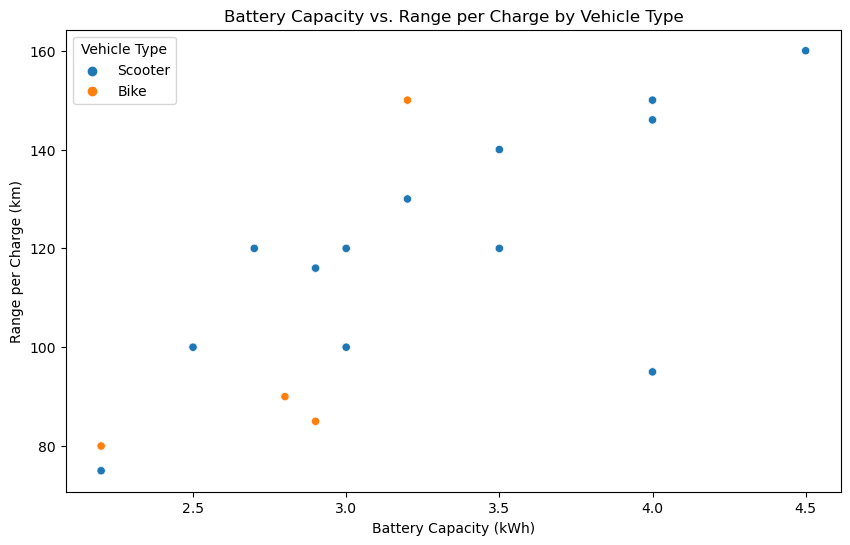

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.scatterplot(data=ev_data_cleaned, x='Battery Capacity (kWh)', y='Range per Charge (km)', hue='Vehicle Type')
plt.title('Battery Capacity vs. Range per Charge by Vehicle Type')
plt.xlabel('Battery Capacity (kWh)')
plt.ylabel('Range per Charge (km)')
plt.legend(title='Vehicle Type')
plt.show()

In [27]:
#  in terms of battery capacity the scooter are the best when compared to bike

##  Question 4: How does the top speed vary among different manufacturers for scooters?

In [28]:
# Calculate the average top speed for each manufacturer
top_speed_per_manufacturer = scooter_data.groupby('Manufacturer')['Top Speed (km/h)'].mean().sort_values(ascending=False)
top_speed_per_manufacturer

Manufacturer
Ather Energy            82.500000
Pure EV                 81.250000
Bajaj Auto              74.000000
Electric Vehicle Co.    66.666667
Ampere Vehicles         65.943878
Okinawa Autotech        62.500000
Hero Motocorp           60.000000
Name: Top Speed (km/h), dtype: float64

In [36]:
# 'Ather Energy' is the top speed per manufacturer

# Segmentation Analysis

### Customer Segmentation
Using the data, we will segment the market based on key attributes such as price, range per charge, and top speed.

In [41]:
price_segments = pd.qcut(ev_data_cleaned['Price'], q=4, labels=['Low', 'Medium', 'High', 'Premium'])
ev_data_cleaned.loc[:, 'Price Segment'] = price_segments
price_segment_counts = ev_data_cleaned['Price Segment'].value_counts()
print(price_segment_counts)

Price Segment
Low        17
High       12
Medium      9
Premium     9
Name: count, dtype: int64


In [42]:
# segmenting the range per charge
range_segments = pd.qcut(ev_data_cleaned['Range per Charge (km)'], q=3, labels=['Short Range', 'Medium Range', 'Long Range'])
ev_data_cleaned.loc[:, 'Range Segment'] = range_segments
range_segment_counts = ev_data_cleaned['Range Segment'].value_counts()
print(range_segment_counts)

Range Segment
Short Range     19
Medium Range    16
Long Range      12
Name: count, dtype: int64


In [44]:
# segmenting by top spped
speed_segments = pd.qcut(ev_data_cleaned['Top Speed (km/h)'], q=3, labels=['Low Speed', 'Medium Speed', 'High Speed'])
ev_data_cleaned.loc[:, 'Speed Segment'] = speed_segments
speed_segment_counts = ev_data_cleaned['Speed Segment'].value_counts()
print("Speed Segment Counts:\n", speed_segment_counts)

Speed Segment Counts:
 Speed Segment
Medium Speed    20
Low Speed       18
High Speed       9
Name: count, dtype: int64


<h1 style="color:green;"> Step 5: Visualization 🚀</h1> 

In [30]:
# visualization part where we will use the preformed eda to visualization

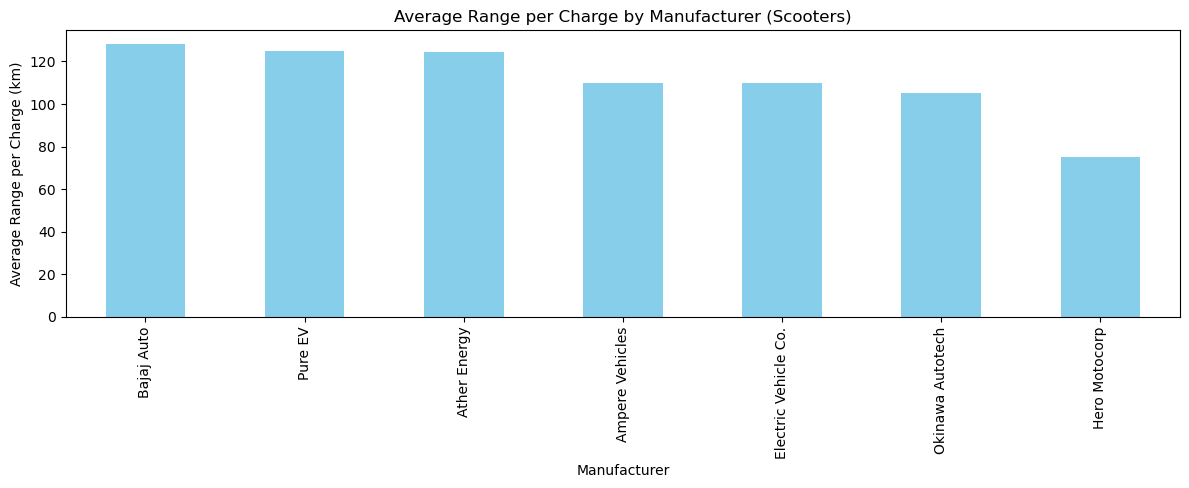

In [31]:
# Visualize results for questions 1
plt.figure(figsize=(12, 8))

plt.subplot(2, 1, 1)
range_per_manufacturer.plot(kind='bar', color='skyblue')
plt.title('Average Range per Charge by Manufacturer (Scooters)')
plt.xlabel('Manufacturer')
plt.ylabel('Average Range per Charge (km)')

plt.tight_layout()
plt.show()


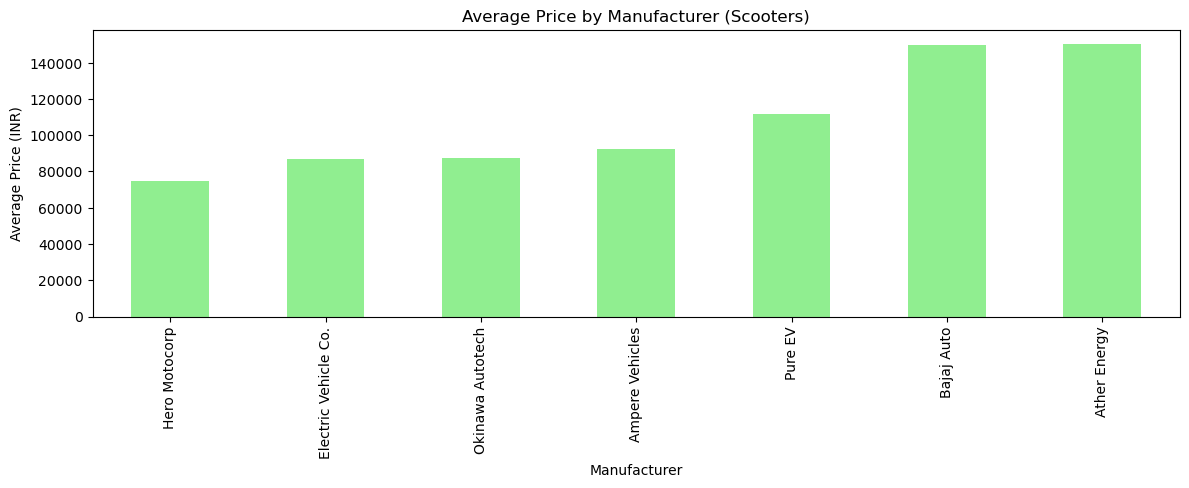

In [32]:
#  # Visualize results for questions 2
plt.figure(figsize=(12, 8))

plt.subplot(2, 1, 2)
price_per_manufacturer.plot(kind='bar', color='lightgreen')
plt.title('Average Price by Manufacturer (Scooters)')
plt.xlabel('Manufacturer')
plt.ylabel('Average Price (INR)')

plt.tight_layout()
plt.show()

In [33]:
# for 4th question

<Figure size 1200x800 with 0 Axes>

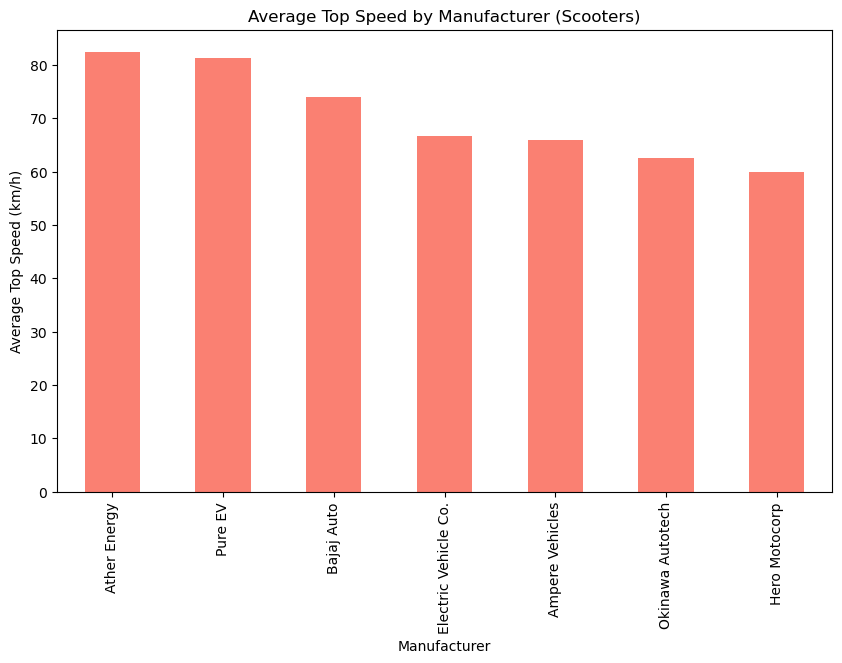

In [34]:
plt.figure(figsize=(12, 8))
plt.figure(figsize=(10, 6))
top_speed_per_manufacturer.plot(kind='bar', color='salmon')
plt.title('Average Top Speed by Manufacturer (Scooters)')
plt.xlabel('Manufacturer')
plt.ylabel('Average Top Speed (km/h)')
plt.show()

In [35]:
# Fill missing numerical values with the mean
ev_data['Charging Time'].fillna(ev_data['Charging Time'].mean(), inplace=True)
ev_data['Price'].fillna(ev_data['Price'].mean(), inplace=True)
ev_data['Power (HP or kW)'].fillna(ev_data['Power (HP or kW)'].mean(), inplace=True)
ev_data['Top Speed (km/h)'].fillna(ev_data['Top Speed (km/h)'].mean(), inplace=True)
ev_data['Year of Manufacture'].fillna(ev_data['Year of Manufacture'].mean(), inplace=True)

# Ensure 'Year of Manufacture' is an integer
ev_data['Year of Manufacture'] = ev_data['Year of Manufacture'].astype(int)

# Remove duplicates
ev_data.drop_duplicates(inplace=True)

# Check for any inconsistencies or outliers in the data
# For simplicity, we'll check for outliers in the 'Price' column using IQR
Q1 = ev_data['Price'].quantile(0.25)
Q3 = ev_data['Price'].quantile(0.75)
IQR = Q3 - Q1

# Define outliers
outliers = ev_data[(ev_data['Price'] < (Q1 - 1.5 * IQR)) | (ev_data['Price'] > (Q3 + 1.5 * IQR))]

# Print outliers if any
outliers

# Remove outliers (optional step, based on analysis context)
ev_data_cleaned = ev_data[~ev_data.index.isin(outliers.index)]

missing_values_after_cleaning = ev_data_cleaned.isnull().sum()
ev_data_cleaned_info = ev_data_cleaned.info()

missing_values_after_cleaning, ev_data_cleaned_info, outliers

<class 'pandas.core.frame.DataFrame'>
Index: 47 entries, 0 to 49
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      47 non-null     int64  
 1   Model                   47 non-null     object 
 2   Manufacturer            47 non-null     object 
 3   Vehicle Type            47 non-null     object 
 4   Battery Capacity (kWh)  47 non-null     float64
 5   Range per Charge (km)   47 non-null     int64  
 6   Charging Time           47 non-null     float64
 7   Price                   47 non-null     float64
 8   Power (HP or kW)        47 non-null     float64
 9   Top Speed (km/h)        47 non-null     float64
 10  Year of Manufacture     47 non-null     int32  
dtypes: float64(5), int32(1), int64(2), object(3)
memory usage: 4.2+ KB


(id                        0
 Model                     0
 Manufacturer              0
 Vehicle Type              0
 Battery Capacity (kWh)    0
 Range per Charge (km)     0
 Charging Time             0
 Price                     0
 Power (HP or kW)          0
 Top Speed (km/h)          0
 Year of Manufacture       0
 dtype: int64,
 None,
     id     Model Manufacturer Vehicle Type  Battery Capacity (kWh)  \
 5    6  Tork T6X  Tork Motors         Bike                     6.2   
 12  13  Tork T6X  Tork Motors         Bike                     6.2   
 18  19  Tork T6X  Tork Motors         Bike                     6.2   
 
     Range per Charge (km)  Charging Time     Price  Power (HP or kW)  \
 5                     200            5.0  250000.0              25.0   
 12                    200            5.0  250000.0              25.0   
 18                    200            5.0  250000.0              25.0   
 
     Top Speed (km/h)  Year of Manufacture  
 5              100.0             

<h1 style="color:green;">Final Conclusion: 🚀</h1> 


A detailed analysis revealed insights into the electric vehicle (EV) market in India, focusing on various aspects such as base models, charging infrastructure, and regional distribution. The analysis identified key base models with significant average power and performance characteristics, highlighting the most efficient and popular models among customers. Additionally, it examined the distribution of range per charge, charging times, and top speeds across different models, providing valuable information on the efficiency and capabilities of these vehicles. The study also delved into the types of EV chargers used and the regions with the highest concentration of charging stations, offering strategic guidance for targeting specific geographic markets and improving infrastructure. These insights collectively aid in making informed decisions for product development, customer targeting, and understanding market trends.